In [2]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.io import loadmat
import torch
from sklearn.decomposition import PCA

In [21]:
# First we'll check that all files can be opened and get a rough count

data_path = "/media/DataDisk/E326/Jun09/"
batches = os.listdir(data_path)

total = 0
for batch in batches:
    if batch in ["E326_09278", "E326_09342", "E326_09331", "E326_09349", "E326_09340", 
                 "E326_09353", "E326_09335", "E326_09336", "E326_09338", "E326_09352", "E326_09337", "E326_09339", "E326_09350", "E326_09351"]:
        continue
    file_path = data_path + batch + "/images/PR11334/PR11334_data.h5"
    file = h5py.File(file_path, "r")
    file_path = data_path + batch + "/images/PR11342/PR11342_data.h5"
    file = h5py.File(file_path, "r")
    file_path = data_path + batch + "/images/PR11356/PR11356_data.h5"
    file = h5py.File(file_path, "r")
    
    datat_struct = loadmat(data_path + batch + "/" + batch + ".mat")["data_struct"]
    
    shape = file['entry/data/data'].shape
    if len(file['entry/data/data'].shape) == 5:
        total += shape[0] * shape[1] * shape[2]
    elif len(file['entry/data/data'].shape) == 4:
        total += shape[0] * shape[1]
    elif len(file['entry/data/data'].shape) == 3:
        total += shape[0]
        
print(total)

38620


/tmp/ipykernel_837868/1915267181.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


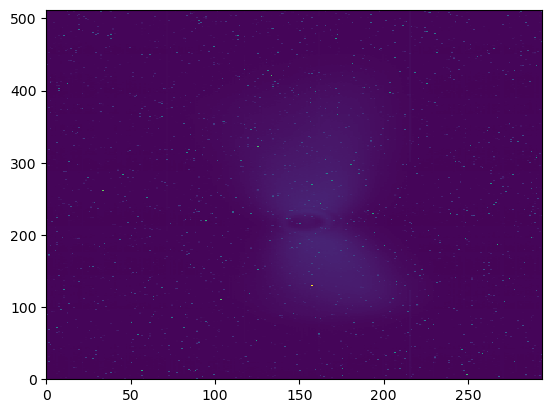

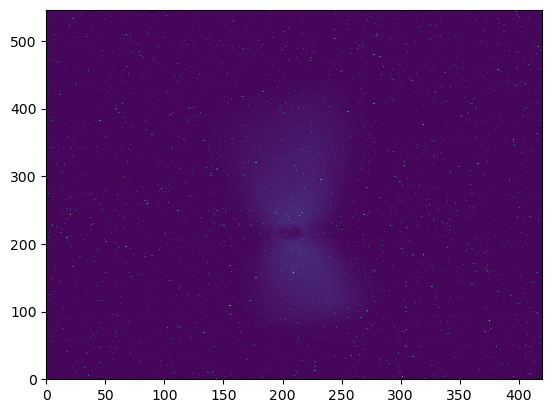

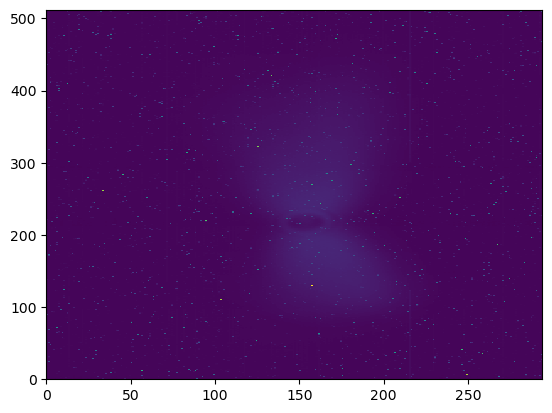

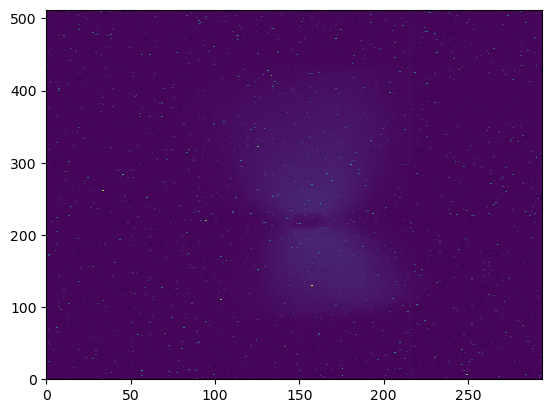

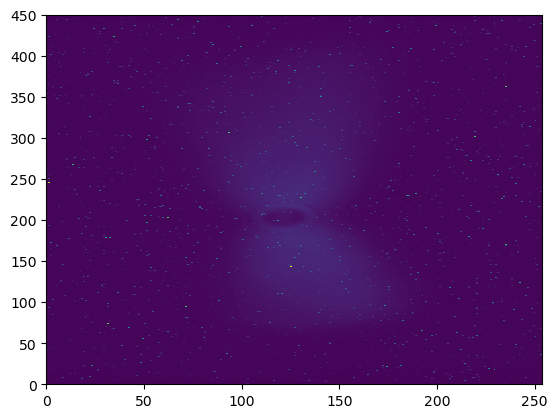

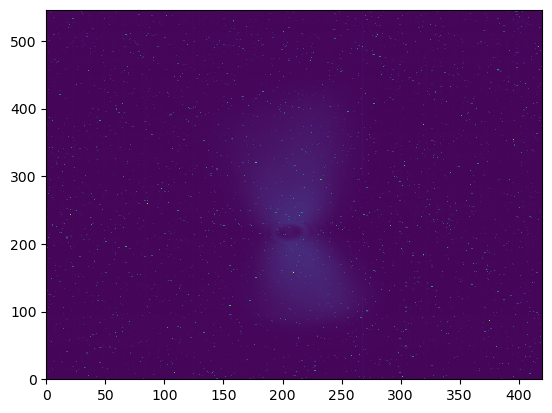

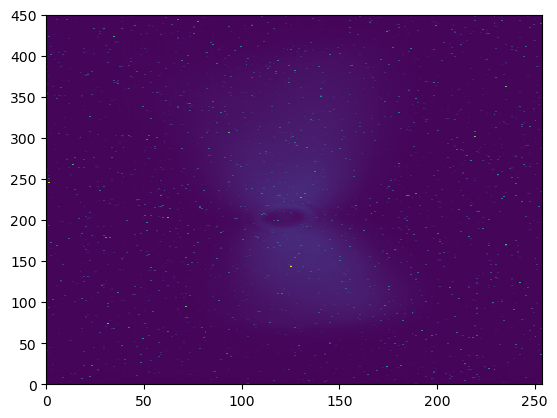

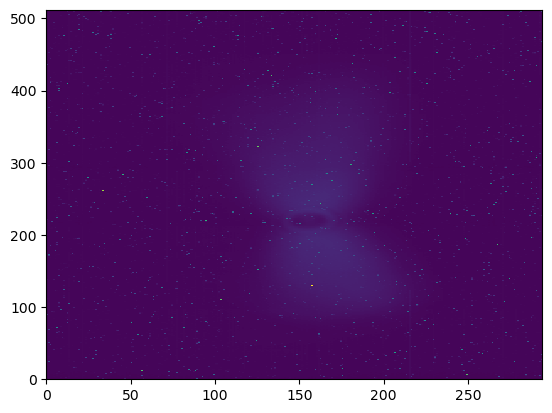

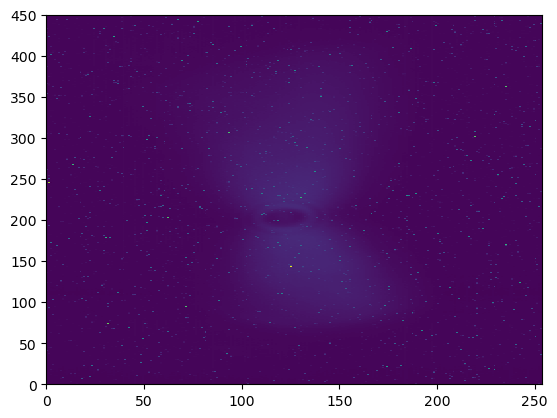

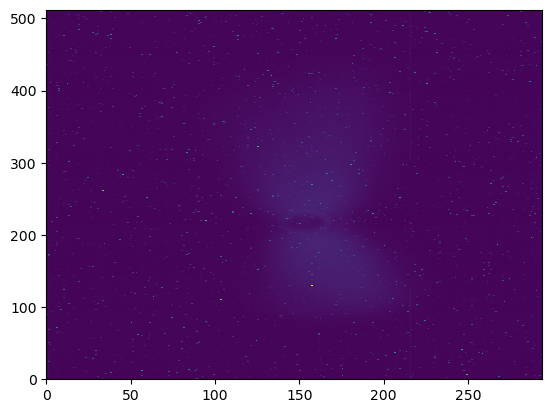

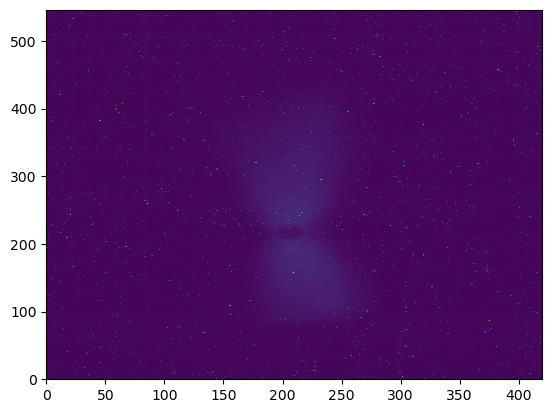

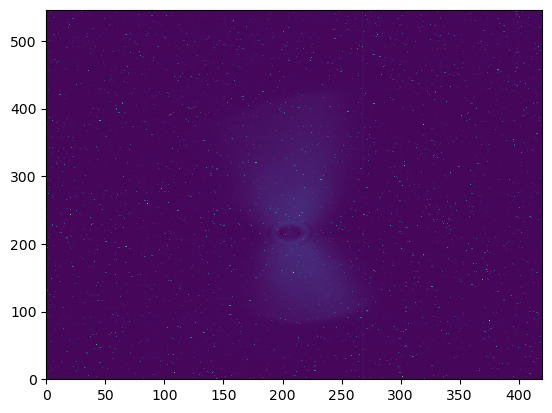

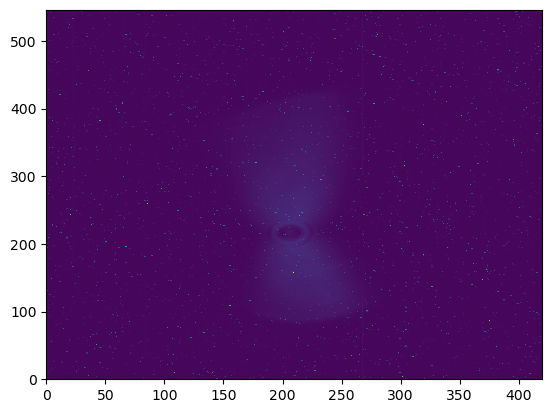

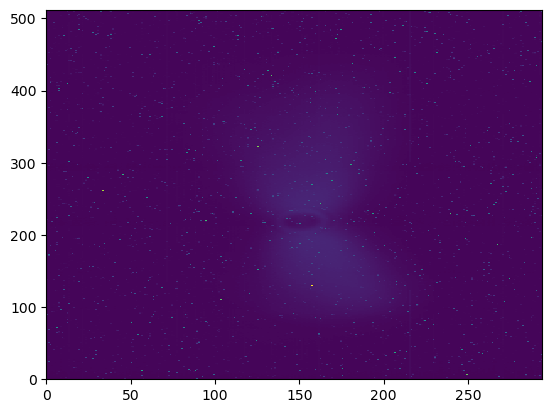

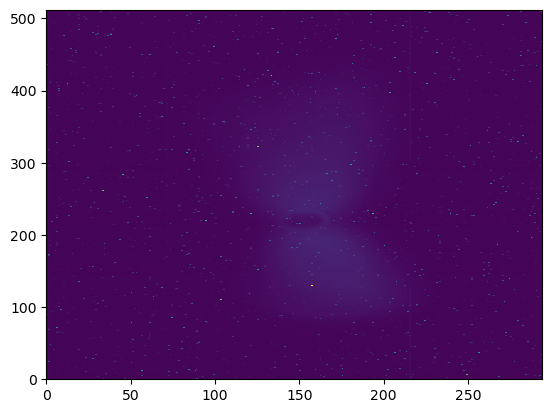

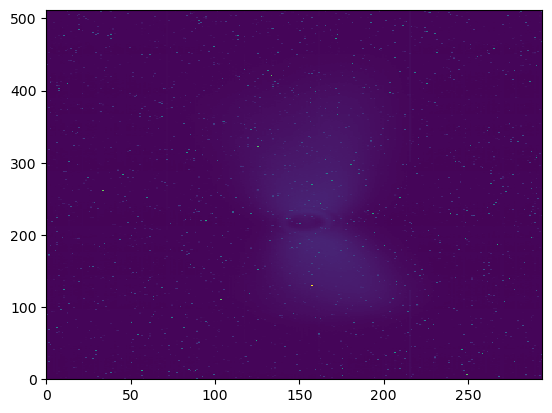

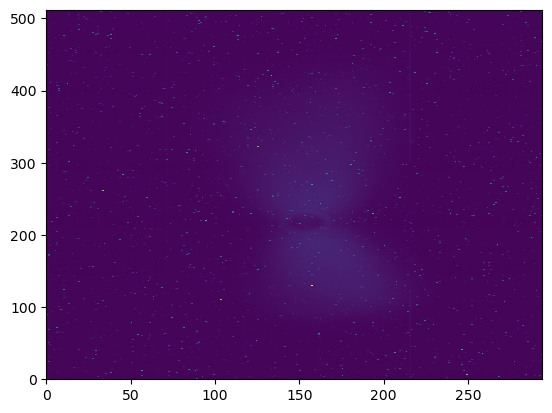

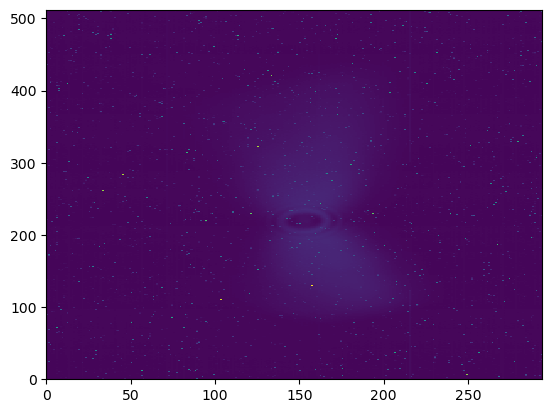

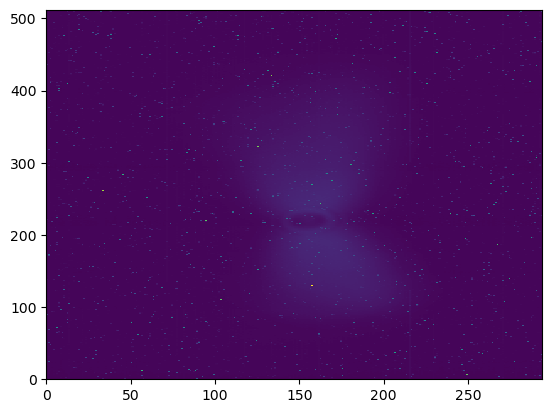

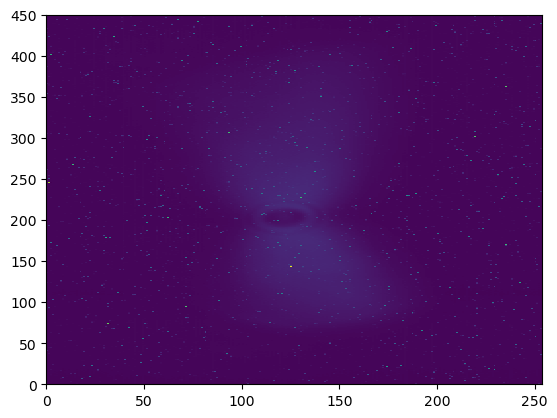

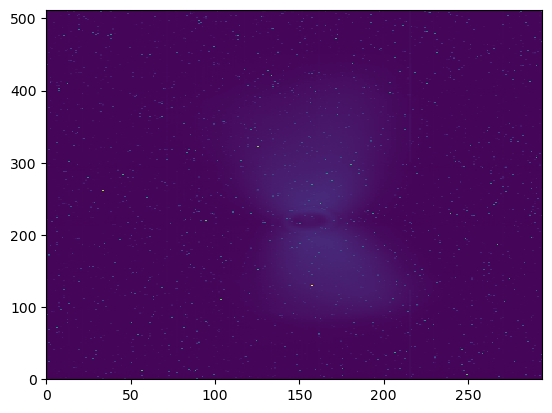

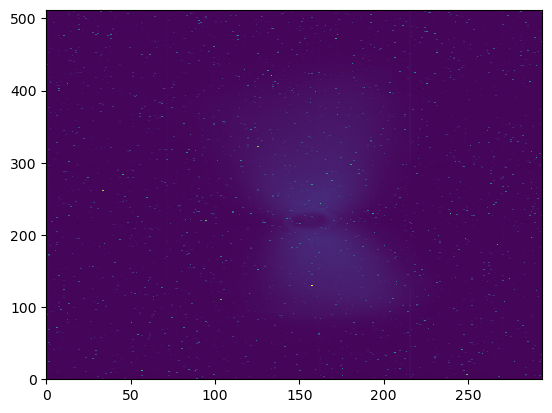

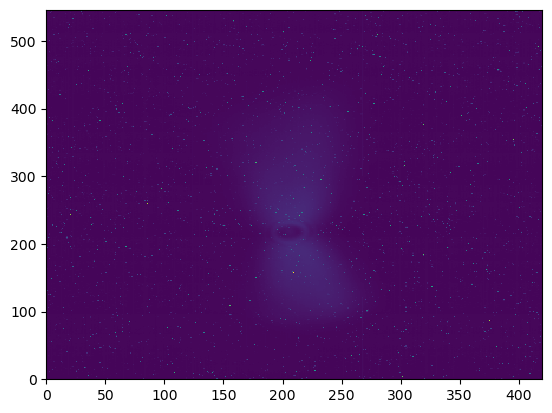

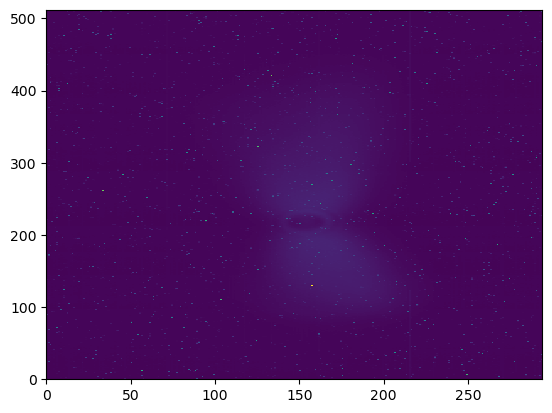

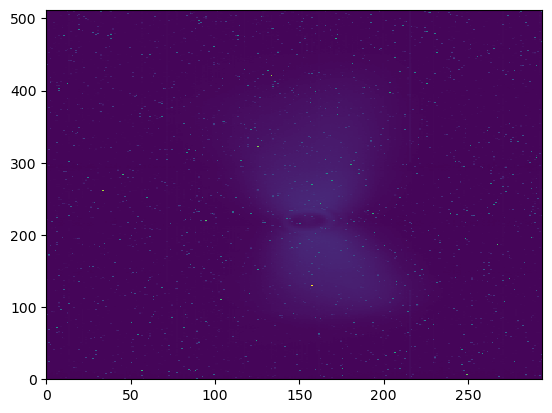

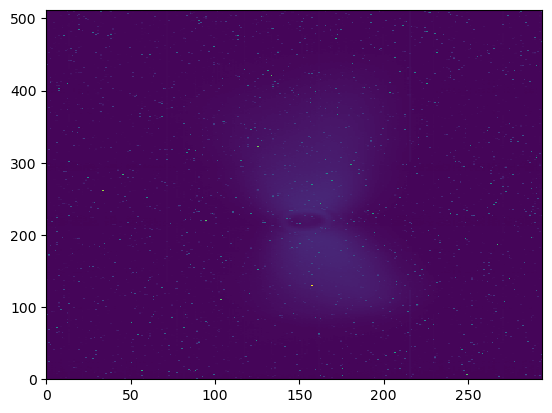

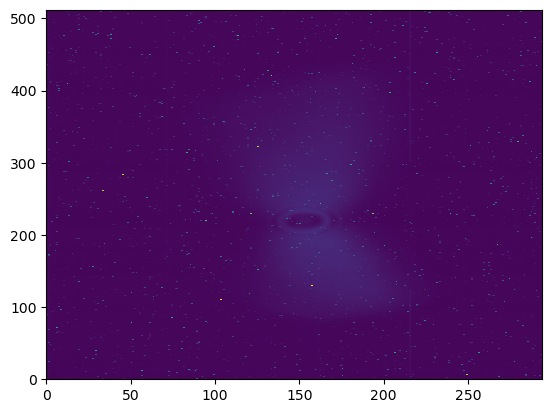

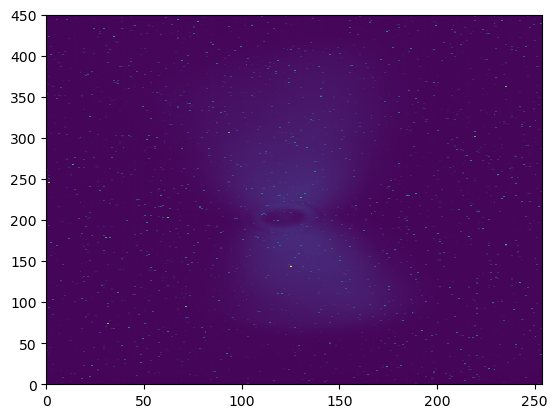

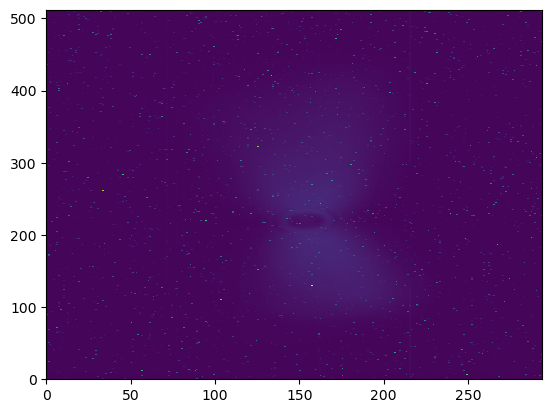

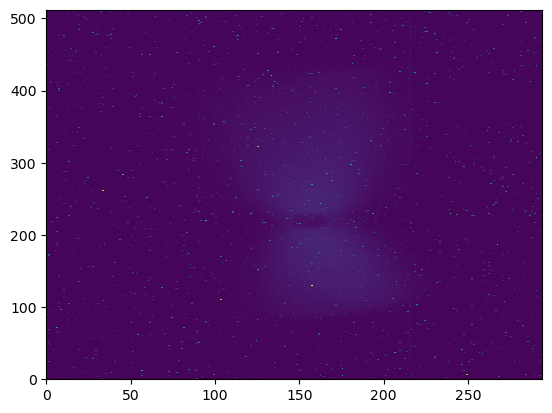

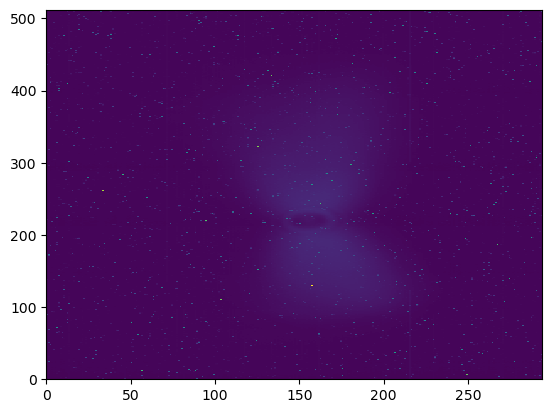

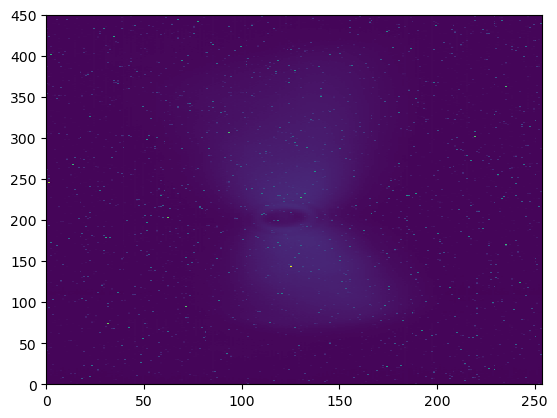

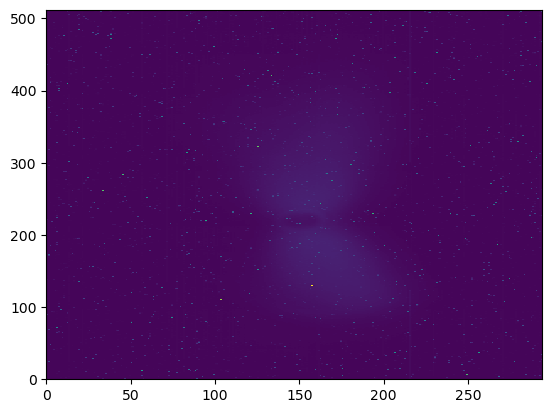

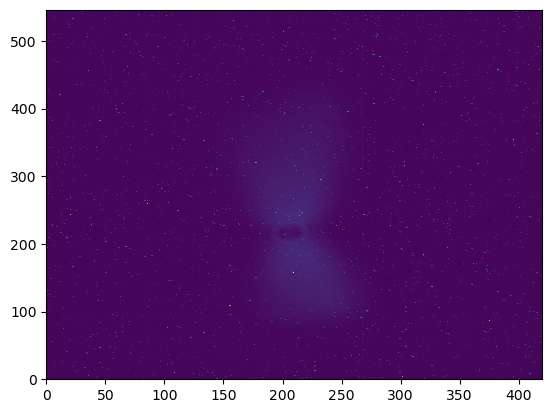

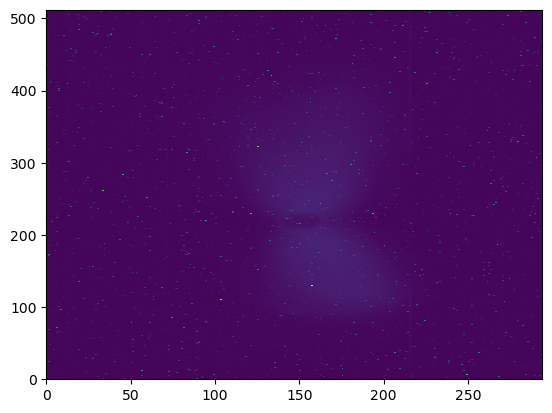

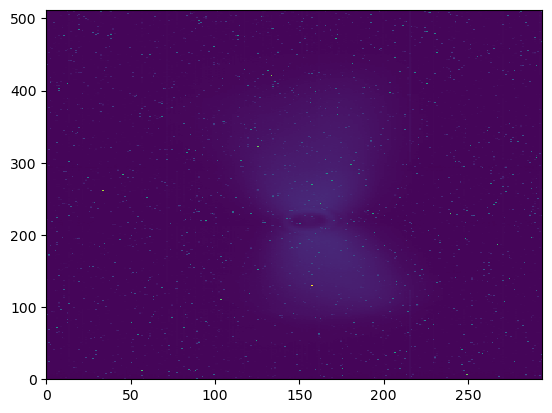

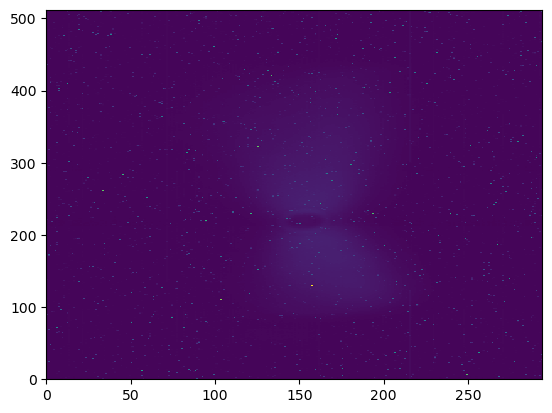

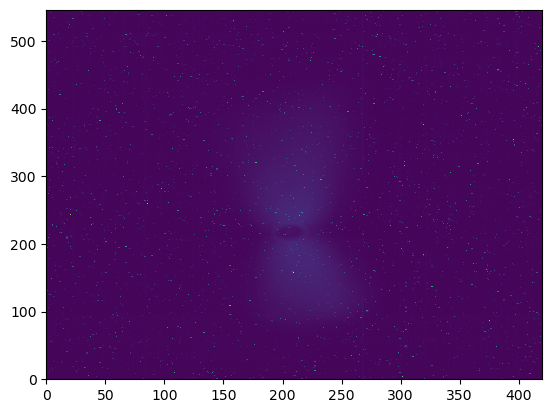

38620


In [10]:
# Now we'll check if the profile monitor was in

data_path = "/media/DataDisk/E326/Jun09/"
batches = os.listdir(data_path)

for batch in batches:
    if batch in ["E326_09278", "E326_09342", "E326_09331", "E326_09349", "E326_09340", 
                 "E326_09353", "E326_09335", "E326_09336", "E326_09338", "E326_09352", "E326_09337", "E326_09339", "E326_09350", "E326_09351"]:
        continue

    file_path = data_path + batch + "/images/PR11342/PR11342_data.h5"
    file = h5py.File(file_path, "r")
    shape = file['entry/data/data'].shape
    if len(file['entry/data/data'].shape) == 5:
        data = np.mean(np.array(file['entry/data/data']), axis=(0, 1, 2))
    elif len(file['entry/data/data'].shape) == 4:
        data = np.mean(np.array(file['entry/data/data']), axis=(0, 1))
    elif len(file['entry/data/data'].shape) == 3:
        data = np.mean(np.array(file['entry/data/data']), axis=(0))
        
    fig, ax = plt.subplots()
    ax.pcolormesh(data)
plt.show()
    
print(total)

In [22]:
## Now we'll make sure we can align all the images
data_path = "/media/DataDisk/E326/Jun09/"
batches = os.listdir(data_path)

#batches = ["E326_09285", "E326_09348", "E326_09347", "E326_09346", "E326_09345", "E326_09344", "E326_09343"]

start_334 = [488, 552]
start_342 = [324, 547]
start_356 = [418, 494]

dataset_334 = []
dataset_342 = []
dataset_356 = []
for i, batch in enumerate(batches):
    print(batch)
    
    # Skip bad batches
    if batch in ["E326_09278", "E326_09342", "E326_09331", "E326_09349",
                 "E326_09340", "E326_09353", "E326_09335", "E326_09336", 
                 "E326_09338", "E326_09352", "E326_09337", "E326_09339",
                 "E326_09350", "E326_09351"]:
        continue

    # Get the image limits
    datat_struct = loadmat(data_path + batch + "/" + batch + ".mat")["data_struct"]
    if len(datat_struct[0][0][1][0][0][5][0][0]) == 2:
        index_334 = 1
        index_342 = 2
        index_356 = 3
    else:
        index_334 = 2
        index_342 = 3
        index_356 = 4
    min_334_y = datat_struct[0][0][1][0][0][index_334][0][0][5][0][0]
    min_334_x = datat_struct[0][0][1][0][0][index_334][0][0][6][0][0]
    min_342_y = datat_struct[0][0][1][0][0][index_342][0][0][5][0][0]
    min_342_x = datat_struct[0][0][1][0][0][index_342][0][0][6][0][0]
    min_356_y = datat_struct[0][0][1][0][0][index_356][0][0][5][0][0]
    min_356_x = datat_struct[0][0][1][0][0][index_356][0][0][6][0][0]
    
    index_334 = [start_334[0] - min_334_x, start_334[1] - min_334_y]    
    index_342 = [start_342[0] - min_342_x, start_342[1] - min_342_y]
    index_356 = [start_356[0] - min_356_x, start_356[1] - min_356_y]

    if i == 0:
        background_334 = np.array(datat_struct[0][0][-1][0][0][4].T,
                                  dtype=np.float32)
        background_334 = background_334[index_334[0]:index_334[0]+128,
                                        index_334[1]:index_334[1]+128]
        
        background_342 = np.array(datat_struct[0][0][-1][0][0][5].T,
                                  dtype=np.float32)
        background_342 = background_342[index_342[0]:index_342[0]+128,
                                        index_342[1]:index_342[1]+128]
        
        background_356 = np.array(datat_struct[0][0][-1][0][0][6].T,
                                  dtype=np.float32)
        background_356 = background_356[index_356[0]:index_356[0]+128,
                                        index_356[1]:index_356[1]+128]

    file_path_334 = data_path + batch + "/images/PR11334/PR11334_data.h5"
    file_334 = h5py.File(file_path_334, "r")
    file_path_342 = data_path + batch + "/images/PR11342/PR11342_data.h5"
    file_342 = h5py.File(file_path_342, "r")
    file_path_356 = data_path + batch + "/images/PR11356/PR11356_data.h5"
    file_356 = h5py.File(file_path_356, "r")
    
    if len(file_356['entry/data/data'].shape) == 5:
        data_334 = np.array(file_334['entry/data/data'].astype(np.float32))
        data_334 = data_334[..., index_334[0]:index_334[0]+128, index_334[1]:index_334[1]+128]
        data_334 = torch.from_numpy(data_334 - background_334).flatten(0, 2)
        data_342 = np.array(file_342['entry/data/data'].astype(np.float32))
        data_342 = data_342[..., index_342[0]:index_342[0]+128, index_342[1]:index_342[1]+128]
        data_342 = torch.from_numpy(data_342 - background_342).flatten(0, 2)
        data_356 = np.array(file_356['entry/data/data'].astype(np.float32))
        data_356 = data_356[..., index_356[0]:index_356[0]+128, index_356[1]:index_356[1]+128]
        data_356 = torch.from_numpy(data_356 - background_356).flatten(0, 2)
    elif len(file_356['entry/data/data'].shape) == 4:
        data_334 = np.array(file_334['entry/data/data'].astype(np.float32))
        data_334 = data_334[..., index_334[0]:index_334[0]+128, index_334[1]:index_334[1]+128]
        data_334 = torch.from_numpy(data_334 - background_334).flatten(0, 1)
        data_342 = np.array(file_342['entry/data/data'].astype(np.float32))
        data_342 = data_342[..., index_342[0]:index_342[0]+128, index_342[1]:index_342[1]+128]
        data_342 = torch.from_numpy(data_342 - background_342).flatten(0, 1)
        data_356 = np.array(file_356['entry/data/data'].astype(np.float32))
        data_356 = data_356[..., index_356[0]:index_356[0]+128, index_356[1]:index_356[1]+128]
        data_356 = torch.from_numpy(data_356 - background_356).flatten(0, 1)
    elif len(file_356['entry/data/data'].shape) == 3:
        data_334 = np.array(file_334['entry/data/data'].astype(np.float32))
        data_334 = data_334[..., index_334[0]:index_334[0]+128, index_334[1]:index_334[1]+128]
        data_334 = torch.from_numpy(data_334 - background_334)
        data_342 = np.array(file_342['entry/data/data'].astype(np.float32))
        data_342 = data_342[..., index_342[0]:index_342[0]+128, index_342[1]:index_342[1]+128]
        data_342 = torch.from_numpy(data_342 - background_342)
        data_356 = np.array(file_356['entry/data/data'].astype(np.float32))
        data_356 = data_356[..., index_356[0]:index_356[0]+128, index_356[1]:index_356[1]+128]
        data_356 = torch.from_numpy(data_356 - background_356)
        
    dataset_334.append(torch.clip(data_334, min=0, max=300))
    dataset_342.append(torch.clip(data_342, min=0, max=300))
    dataset_356.append(torch.clip(data_356, min=0, max=300))


dataset_334 = torch.cat(dataset_334)
dataset_342 = torch.cat(dataset_342)
dataset_356 = torch.cat(dataset_356)



E326_09285
E326_09323
E326_09281
E326_09296
E326_09278
E326_09345
E326_09321
E326_09349
E326_09342
E326_09340
E326_09343
E326_09353
E326_09293
E326_09346
E326_09283
E326_09335
E326_09324
E326_09333
E326_09334
E326_09294
E326_09274
E326_09336
E326_09284
E326_09282
E326_09279
E326_09289
E326_09348
E326_09292
E326_09290
E326_09338
E326_09322
E326_09286
E326_09287
E326_09295
E326_09280
E326_09344
E326_09320
E326_09352
E326_09297
E326_09291
E326_09337
E326_09347
E326_09276
E326_09339
E326_09327
E326_09350
E326_09275
E326_09288
E326_09273
E326_09331
E326_09351
E326_09326


In [23]:
# We'll now flatten the images and do some pca to check for outliers
dataset_334_flat = dataset_334.flatten(1,2)
dataset_342_flat = dataset_342.flatten(1,2)
dataset_356_flat = dataset_356.flatten(1,2)
print(dataset_334.shape)

torch.Size([38620, 128, 128])


3 [3603 3604 5982]


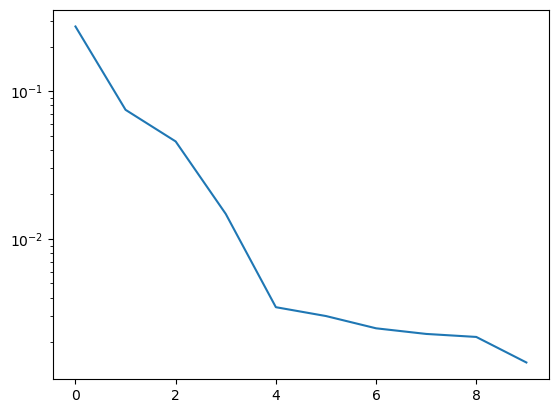

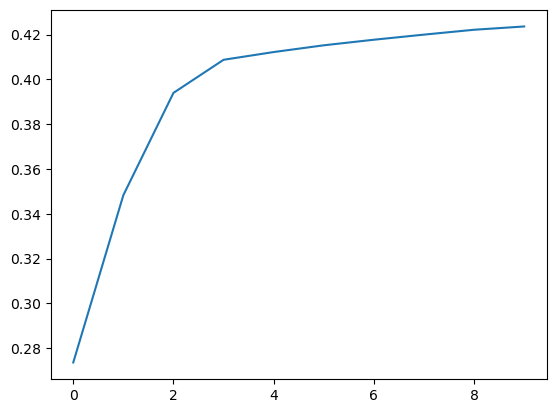

In [24]:
# Apply pca to B1B2
pca = PCA(n_components=10)
pca.fit(dataset_334_flat)

# Plot the component explainable variance
fig, ax = plt.subplots()
ax.semilogy(pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))

# Get embedding and norm
data_emb = pca.transform(dataset_334_flat)
data_emb = (data_emb - np.mean(data_emb, axis=0)) / np.std(data_emb, axis=0)

# Get the bad indices
bad_index = []
for i in range(10):
    bad_index.append(np.where(np.abs(data_emb[:, i]) > 5.5)[0])
bad_index = np.unique(np.concatenate(bad_index))

dataset_334 = np.delete(dataset_334, bad_index, axis=0)
print(len(bad_index), bad_index)

135 [ 5982 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590
 15591 15592 15593 15594 15595 15596 15597 15598 15599 15600 15601 15602
 15603 15604 15605 15606 15607 15608 15609 15610 15611 15612 15613 15614
 15615 15616 15617 15618 15619 33260 33261 33262 33263 33264 33265 33266
 33267 33268 33269 33270 33271 33272 33273 33274 33275 33276 33277 33278
 33279 33280 33281 33282 33283 33284 33285 33286 33287 33288 33289 33290
 33291 33292 33293 33294 33295 33296 33297 33298 33299 35580 35581 35585
 35586 35587 35588 35590 35591 35605 35606 35608 35609 35614 35616 35620
 35621 35622 35623 35624 35625 35626 35627 35628 35629 35630 35631 35632
 35633 35634 35635 35636 35637 35638 35639 35640 35641 35642 35643 35644
 35645 35646 35647 35648 35649 35650 35651 35652 35653 35654 35655 35656
 35657 35658 35659]


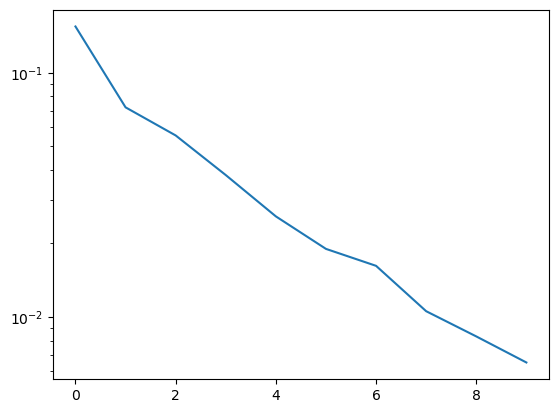

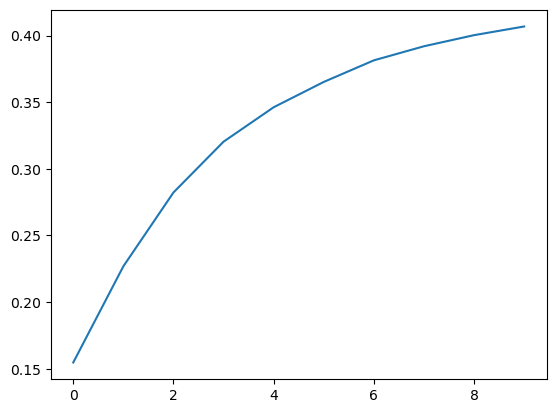

In [25]:
# Apply pca to B2B3
pca = PCA(n_components=10)
pca.fit(dataset_342_flat)

# Plot the component explainable variance
fig, ax = plt.subplots()
ax.semilogy(pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))

# Get embedding and norm
data_emb = pca.transform(dataset_342_flat)
data_emb = (data_emb - np.mean(data_emb, axis=0)) / np.std(data_emb, axis=0)

# Get the bad indices
bad_index = []
for i in range(10):
    bad_index.append(np.where(np.abs(data_emb[:, i]) > 5.5)[0])
bad_index = np.unique(np.concatenate(bad_index))

dataset_342 = np.delete(dataset_342, bad_index, axis=0)
print(len(bad_index), bad_index)

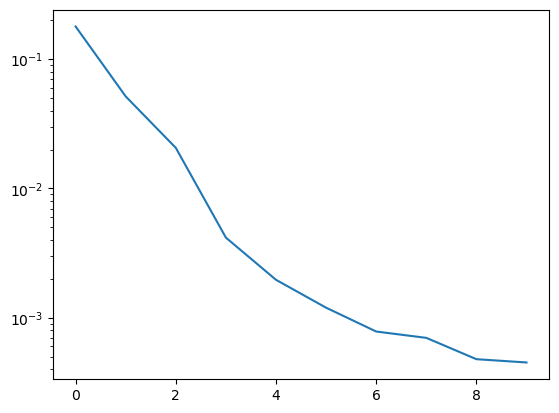

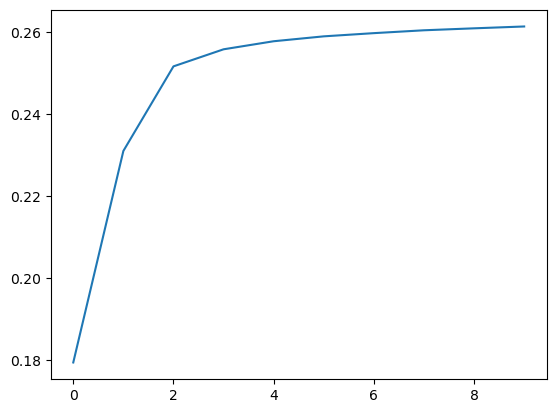

In [26]:
# Apply pca to B3B4
pca = PCA(n_components=10)
pca.fit(dataset_356_flat)

# Plot the component explainable variance
fig, ax = plt.subplots()
ax.semilogy(pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))

# Get embedding and norm
data_emb = pca.transform(dataset_356_flat)
data_emb = (data_emb - np.mean(data_emb, axis=0)) / np.std(data_emb, axis=0)

# Get the bad indices
bad_index = []
for i in range(10):
    bad_index.append(np.where(np.abs(data_emb[:, i]) > 5.)[0])
bad_index = np.unique(np.concatenate(bad_index))

dataset_356 = np.delete(dataset_356, bad_index, axis=0)

In [27]:
print(dataset_334.shape)
print(dataset_342.shape)
print(dataset_356.shape)

torch.Size([38617, 128, 128])
torch.Size([38485, 128, 128])
torch.Size([38617, 128, 128])


In [28]:
with h5py.File('B1B2.h5', 'w') as hf:
    hf.create_dataset("Images",  data=dataset_334)
with h5py.File('B2B3.h5', 'w') as hf:
    hf.create_dataset("Images",  data=dataset_342)
with h5py.File('B3B4.h5', 'w') as hf:
    hf.create_dataset("Images",  data=dataset_356)